# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [3]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.

#properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

The previous line of code runs into `HTTPError: HTTP Error 403: Forbidden`, due to lack of access to the datasource. I used the following workaround to load the data instead. Another option would be downloading the file and then loading it, which gives the same result.

In [4]:
import requests
from io import BytesIO

response = requests.get(url_LondonHousePrices)

# Put this data into a variable called properties.  
properties = pd.read_excel(BytesIO(response.content), sheet_name='Average price', index_col=None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [5]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,90347,51870,98948,64956,76880,83082,119775,70118,85469,...,40907,42171,43856,46470,56098,79687,64502,52799,NaN,50231
2,1995-02-01,81213,52513,98848,64786,77651,83068,118365,69908,86551,...,40877,41912,44344,47249,55991,77913,64196,52462,NaN,50130
3,1995-03-01,78168,52701,97848,64366,77644,82856,119131,69666,87067,...,41351,42544,43701,47345,55574,79110,64597,51716,NaN,50229
4,1995-04-01,76172,54618,96273,64276,78668,82525,118948,69562,87933,...,41195,42934,44414,47359,55966,79708,65111,52877,NaN,50597


**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [7]:
properties.columns

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

We observe there are column names such as `Unnamed: ...`. We need to make sure they are empty, and if so, drop them. 


In [8]:
properties['Unnamed: 0']

0            NaT
1     1995-01-01
2     1995-02-01
3     1995-03-01
4     1995-04-01
         ...    
356   2024-08-01
357   2024-09-01
358   2024-10-01
359   2024-11-01
360   2024-12-01
Name: Unnamed: 0, Length: 361, dtype: datetime64[ns]

In [9]:
filtered_df = properties.filter(regex='Unnamed*', axis=1)
filtered_df.head()

,Unnamed: 0,Unnamed: 34,Unnamed: 37,Unnamed: 47
0,NaT,NaN,NaN,NaN
1,1995-01-01,NaN,NaN,NaN
2,1995-02-01,NaN,NaN,NaN
3,1995-03-01,NaN,NaN,NaN
4,1995-04-01,NaN,NaN,NaN


In [10]:
filtered_df.dtypes

Unnamed: 0     datetime64[ns]
Unnamed: 34           float64
Unnamed: 37           float64
Unnamed: 47           float64
dtype: object

In [11]:
filtered_df.isnull().sum()

Unnamed: 0       1
Unnamed: 34    361
Unnamed: 37    361
Unnamed: 47    361
dtype: int64

In [12]:
filtered_df.shape

(361, 4)

All other columns with the `Unnamed: ...` name are empty. So, we can safely drop them. But, first, let's check the number of nulls in the original dataframe. Just to make sure we are not missing anything, let's double check the number of `null` items before and after cleaning.

In [13]:
print('The number of Nulls in the data before filtering: ')
properties.isnull().sum()

The number of Nulls in the data before filtering: 


Unnamed: 0                1
City of London            0
Barking & Dagenham        0
Barnet                    0
Bexley                    0
Brent                     0
Bromley                   0
Camden                    0
Croydon                   0
Ealing                    0
Enfield                   0
Greenwich                 0
Hackney                   0
Hammersmith & Fulham      0
Haringey                  0
Harrow                    0
Havering                  0
Hillingdon                0
Hounslow                  0
Islington                 0
Kensington & Chelsea      0
Kingston upon Thames      0
Lambeth                   0
Lewisham                  0
Merton                    0
Newham                    0
Redbridge                 0
Richmond upon Thames      0
Southwark                 0
Sutton                    0
Tower Hamlets             0
Waltham Forest            0
Wandsworth                0
Westminster               0
Unnamed: 34             361
Inner London        

In [14]:
properties.drop(columns= ['Unnamed: 34', 'Unnamed: 37', 'Unnamed: 47'], inplace = True)


In [15]:
print('The number of Nulls in the data AFTER filtering: ')
properties.isnull().sum()


The number of Nulls in the data AFTER filtering: 


Unnamed: 0              1
City of London          0
Barking & Dagenham      0
Barnet                  0
Bexley                  0
Brent                   0
Bromley                 0
Camden                  0
Croydon                 0
Ealing                  0
Enfield                 0
Greenwich               0
Hackney                 0
Hammersmith & Fulham    0
Haringey                0
Harrow                  0
Havering                0
Hillingdon              0
Hounslow                0
Islington               0
Kensington & Chelsea    0
Kingston upon Thames    0
Lambeth                 0
Lewisham                0
Merton                  0
Newham                  0
Redbridge               0
Richmond upon Thames    0
Southwark               0
Sutton                  0
Tower Hamlets           0
Waltham Forest          0
Wandsworth              0
Westminster             0
Inner London            0
Outer London            0
NORTH EAST              0
NORTH WEST              0
YORKS & THE 

In [16]:
properties.shape

(361, 46)

We are still 14 columns more than the number of boruroughs. One column is the dates. Excluding that, we have 13 extra columns. Let's do some more exploration. 

The `.unique()` method shows no repetition in the names. But, let's print the column names again. There seems to be some mixture of capitalization and lower case names.


In [17]:
properties.columns.unique().shape

(46,)

In [18]:
properties.columns

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Inner London', 'Outer London', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS', 'WEST MIDLANDS',
       'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 'SOUTH WEST', 'England'],
      dtype='object')

In [19]:
columns = list(properties.columns)
columns_lower = []
for item in columns:
    columns_lower.append(item.lower())
len(set(columns_lower))

46

The issue is not with duplicate names. However,there are extra names when we compare this list to [this source](https://en.wikipedia.org/wiki/London_boroughs). We need to drop these columns. All the columns including and after `Inner London` are extra. So, I find the index of `Inner London` first and keep everything up to that index. 

In [20]:
# finding index of Inner London
properties.columns.get_loc('Inner London')

34

In [25]:
# keeping entries up to that and assigining it to a new dataframe
boroughs = properties.iloc[:,:34]

boroughs.shape

(361, 34)

In [26]:
boroughs.columns

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster'],
      dtype='object')

**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [27]:
boroughs.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
boroughs.head()

,Date,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E09000024,E09000025,E09000026,E09000027,E09000028,E09000029,E09000030,E09000031,E09000032,E09000033
1,1995-01-01,90347,51870,98948,64956,76880,83082,119775,70118,85469,...,87732,55939,70909,115973,78355,72321,65716,63315,101607,141417
2,1995-02-01,81213,52513,98848,64786,77651,83068,118365,69908,86551,...,85500,55536,70862,117858,74793,71670,68409,62213,101701,139762
3,1995-03-01,78168,52701,97848,64366,77644,82856,119131,69666,87067,...,86226,55854,71216,113851,75906,71077,70188,62852,99961,140604
4,1995-04-01,76172,54618,96273,64276,78668,82525,118948,69562,87933,...,85508,56922,70948,113373,72802,70173,72706,62956,99848,141784


In [28]:
boroughs.set_index('Date', inplace = True)

In [29]:
# Get rid of the row with NaT
boroughs= boroughs.iloc[1:, :]

boroughs.head()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-01,90347,51870,98948,64956,76880,83082,119775,70118,85469,77018,...,87732,55939,70909,115973,78355,72321,65716,63315,101607,141417
1995-02-01,81213,52513,98848,64786,77651,83068,118365,69908,86551,77698,...,85500,55536,70862,117858,74793,71670,68409,62213,101701,139762
1995-03-01,78168,52701,97848,64366,77644,82856,119131,69666,87067,76674,...,86226,55854,71216,113851,75906,71077,70188,62852,99961,140604
1995-04-01,76172,54618,96273,64276,78668,82525,118948,69562,87933,75880,...,85508,56922,70948,113373,72802,70173,72706,62956,99848,141784
1995-05-01,83392,54524,95737,63995,79464,82951,118781,69800,87813,75017,...,86453,58305,71083,114256,74356,70524,72926,63496,99265,142359


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [30]:
# Transpose the table
dfT= boroughs.transpose().reset_index()
dfT.head()

Date,index,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
0,City of London,90347,81213,78168,76172,83392,93757,108801,110976,103215,...,892515,871986,860972,797832,745201,731341,713777,687104,680670,792499
1,Barking & Dagenham,51870,52513,52701,54618,54524,55200,53569,53691,52909,...,342817,344631,344640,342051,349225,347689,350143,351439,354980,355594
2,Barnet,98948,98848,97848,96273,95737,95577,96992,97968,98936,...,604879,608108,616911,620768,625383,628771,625476,622268,624855,616916
3,Bexley,64956,64786,64366,64276,63995,64251,63721,64431,64508,...,395095,396719,395600,400090,399746,404894,407291,409074,406843,403541
4,Brent,76880,77651,77644,78668,79464,80118,79920,79295,79557,...,555677,540262,538706,567471,570755,585713,589162,597468,593162,570649


In [31]:
# Melt the table
dfM = dfT.melt(id_vars= ['index'])

In [32]:
dfM.head()

,index,Date,value
0,City of London,1995-01-01,90347
1,Barking & Dagenham,1995-01-01,51870
2,Barnet,1995-01-01,98948
3,Bexley,1995-01-01,64956
4,Brent,1995-01-01,76880


In [33]:
# renaming the index column to something more meaningful : 'Borough Name'

dfM.rename(columns = {'index': 'Borough Name'}, inplace = True)
dfM.head()

,Borough Name,Date,value
0,City of London,1995-01-01,90347
1,Barking & Dagenham,1995-01-01,51870
2,Barnet,1995-01-01,98948
3,Bexley,1995-01-01,64956
4,Brent,1995-01-01,76880


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [34]:
dfM.dtypes

Borough Name            object
Date            datetime64[ns]
value                   object
dtype: object

We need `value` to be of type `float`.

In [35]:
dfM['value'] = dfM['value'].astype(float)

**2.5. Cleaning the data (part 3)**

This cleaning was done in part **2.2.** already. There is no `null` data and the list only icludes legitimate boroughs.

~~Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column?~~

~~Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit.~~

In [43]:
df_London = dfM[dfM['Borough Name'] == 'City of London']

In [44]:
df_London.head()

,Borough Name,Date,value
0,City of London,1995-01-01,90347.0
33,City of London,1995-02-01,81213.0
66,City of London,1995-03-01,78168.0
99,City of London,1995-04-01,76172.0
132,City of London,1995-05-01,83392.0


In [45]:
df_London.isnull().sum()

Borough Name    0
Date            0
value           0
dtype: int64

In [46]:
df_Barnet = dfM[dfM['Borough Name'] == 'Barnet']
df_Barnet.shape

(360, 3)

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

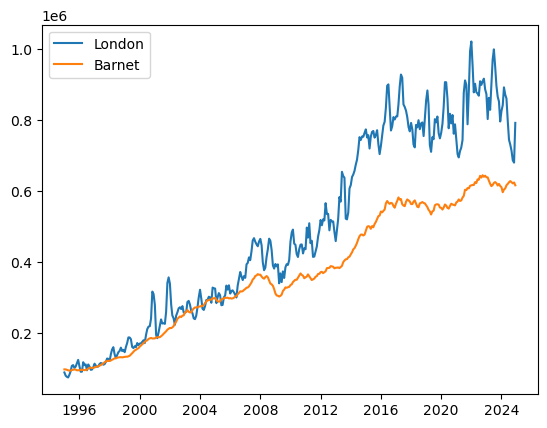

In [49]:
plt.plot(df_London['Date'], df_London['value'])
plt.plot(df_Barnet['Date'], df_Barnet['value'])

plt.legend(['London', 'Barnet'])

plt.show()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

**Option 1: `datetime` module**

In [54]:
import datetime
dfM['Date'] = dfM['Date'].dt.year

In [55]:
dfM.head()

,Borough Name,Date,value
0,City of London,1995,90347.0
1,Barking & Dagenham,1995,51870.0
2,Barnet,1995,98948.0
3,Bexley,1995,64956.0
4,Brent,1995,76880.0


**Option 2: `lamda` function**

In [60]:
#dfM['Date'] = dfM['Date'].apply(lambda x: x.year)

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998. <span style="color: red;">**Note:** The data spans from 1995 to 2025.</span>


Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [70]:
def create_price_ratio(df, borough_name):
    
    df_borough = df[df['Borough Name'] == borough]
    
    grouped = df_borough.groupby('Date')['value'].mean()

    growth = (grouped.iloc[-1] - grouped.iloc[0])/ grouped.iloc[0] * 100
    
    return growth

In [72]:
list_boroughs = list(dfM['Borough Name'].unique()) # we only want one name


In [73]:
rates = {}
for borough in list_boroughs:
    rates[borough] = create_price_ratio(dfM, borough)


In [74]:
rates

{'City of London': 703.8248161015139,
 'Barking & Dagenham': 550.6022513043955,
 'Barnet': 533.634918746539,
 'Bexley': 523.2137834310031,
 'Brent': 623.0033582085601,
 'Bromley': 500.43973835567834,
 'Camden': 599.9455465995983,
 'Croydon': 472.16480215417675,
 'Ealing': 557.8997640830888,
 'Enfield': 509.3433363561849,
 'Greenwich': 606.5730434999128,
 'Hackney': 792.3563442196486,
 'Hammersmith & Fulham': 532.73792541068,
 'Haringey': 611.4308176252861,
 'Harrow': 513.0035144106438,
 'Havering': 507.23993931526354,
 'Hillingdon': 510.54286066378245,
 'Hounslow': 521.2958827718566,
 'Islington': 625.6344713145758,
 'Kensington & Chelsea': 541.9415282774132,
 'Kingston upon Thames': 555.8207412826652,
 'Lambeth': 673.5877480434841,
 'Lewisham': 658.6760557745014,
 'Merton': 602.4003431966872,
 'Newham': 652.0529226416307,
 'Redbridge': 561.3044697961475,
 'Richmond upon Thames': 564.6777969597215,
 'Southwark': 665.845741770434,
 'Sutton': 510.9760430800046,
 'Tower Hamlets': 623.4928

In [75]:
max(rates.values())

792.3563442196486

In [80]:
highest_rate_borough = [key for key, value in rates.items() if value == max(rates.values())]

print('The borough with highest growth is:', highest_rate_borough[0])

The borough with highest growth is: Hackney


In [81]:
sorted_rates = dict(sorted(rates.items(), key=lambda item: item[1], reverse=True))
sorted_rates

{'Hackney': 792.3563442196486,
 'City of London': 703.8248161015139,
 'Waltham Forest': 703.2589527362954,
 'Lambeth': 673.5877480434841,
 'Southwark': 665.845741770434,
 'Lewisham': 658.6760557745014,
 'Newham': 652.0529226416307,
 'Westminster': 637.6199151322473,
 'Islington': 625.6344713145758,
 'Tower Hamlets': 623.4928680469421,
 'Brent': 623.0033582085601,
 'Haringey': 611.4308176252861,
 'Greenwich': 606.5730434999128,
 'Wandsworth': 604.0419526442398,
 'Merton': 602.4003431966872,
 'Camden': 599.9455465995983,
 'Richmond upon Thames': 564.6777969597215,
 'Redbridge': 561.3044697961475,
 'Ealing': 557.8997640830888,
 'Kingston upon Thames': 555.8207412826652,
 'Barking & Dagenham': 550.6022513043955,
 'Kensington & Chelsea': 541.9415282774132,
 'Barnet': 533.634918746539,
 'Hammersmith & Fulham': 532.73792541068,
 'Bexley': 523.2137834310031,
 'Hounslow': 521.2958827718566,
 'Harrow': 513.0035144106438,
 'Sutton': 510.9760430800046,
 'Hillingdon': 510.54286066378245,
 'Enfield'

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

### Answer
The borough with highest growth is "Hackney" with over `792%` increace in housing prices from 1995 to 2025, and the one with lowest growth is "Croydon" with `472%` increase.

To reach this conclusion, I needed to:
1. Load the dataset from its source
2. Explore the dataset for `null` and/or irrelevant data, such as districts that are not one of the London boroughs. 
3. Once exploration was done, I needed to clean the data. This included:<br>
    3.1. Removing `null` values and the extra districts<br>
    3.2. Renaming some columns<br>
    3.3. Removing some rows<br>
    3.4. `transpose` and `melt` the table<br>
    3.5. Checking data types and converting them to correct format<br>
4. Visualizing the growth for some boroughs, i.e. London and Barnet
5. Calculating the growth rate for all the boroughs by defining a function that i) creates a dataframe for each borough and then ii) calculates the means for the first and last year and then iii) claculates the growth ratio 
6. Calling the function and storing the results in a dictionary
7. Finding the `max` growth and its corresponding borough name, which gives us "Hackney"
